# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
sneakers = pd.read_csv("/content/orders.csv")
sneakers.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
sneakers.order_value.mean() #mean is the same as AOV, and is extremely high...

3145.128

In [ ]:
sneakers.order_value.max() # either data was entered in wrong or there are some extreme outliers

704000

In [ ]:
sneakers.order_value.median() # makes more sense as a metric, data must be skewed

284.0

In [ ]:
sneakers.order_value.quantile([0.25,0.50,0.75]) # quantiles seem normal too

0.25    163.0
0.50    284.0
0.75    390.0
Name: order_value, dtype: float64

In [ ]:
# outlier calc

((390-163)*1.5) + 390

730.5

In [ ]:
sneakers.query(" order_value <= 730.5 ", inplace = True) # taking out outliers

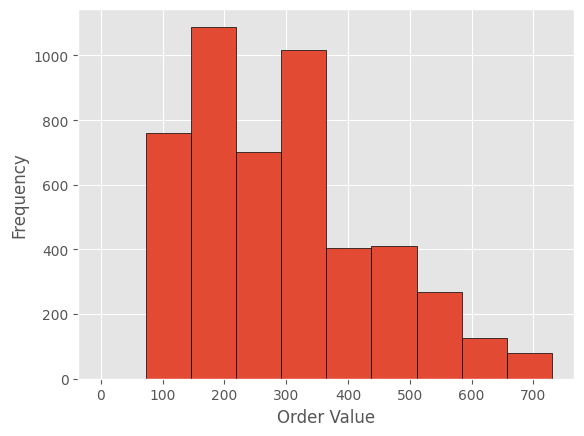

In [ ]:
# distribution of variable

sneakers.order_value.plot.hist(bins = 10, range = (0,730), edgecolor = 'black')
plt.xlabel('Order Value')
plt.style.use("bmh")



In [ ]:
# new metric: look at median of set, and mean after outliers are removed
round(sneakers.order_value.mean(),2)

293.72

In [ ]:
sneakers.order_value.median() # data is slightly right skewed bc mean > median, but not too large of a diff

280.0

Text(0, 0.5, 'Number of Orders')

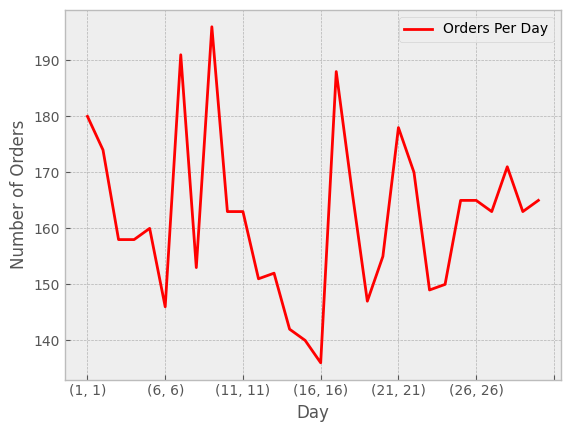

In [ ]:
# extract date from created_at, count orders per day, then graph it

sneakers['created_at'] = pd.to_datetime(sneakers['created_at'])
sneakers['day'] = sneakers['created_at'].dt.day

sneakers.groupby('day')['day'].value_counts().plot(c = 'red')
plt.legend(['Orders Per Day'])
plt.xlabel('Day')
plt.ylabel('Number of Orders')